## Results - Line Charts

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [70]:
# # data frames for conversation domain
# conv_conf_df = pd.read_csv('al_results/fourth/ALResult_News_Conversation_confidence.csv')
# conv_margin_df = pd.read_csv('al_results/fourth/ALResult_News_Conversation_margin.csv')
# conv_random_df = pd.read_csv('al_results/fourth/ALResult_News_Conversation_random.csv')
# conv_vocab_df = pd.read_csv('al_results/fourth/ALResult_News_Conversation_vocab.csv')

# # data frames for legal domain
# legal_conf_df = pd.read_csv('al_results/fourth/ALResult_News_Legal_confidence.csv')
# legal_margin_df = pd.read_csv('al_results/fourth/ALResult_News_Legal_margin.csv')
# legal_random_df = pd.read_csv('al_results/fourth/ALResult_News_Legal_random.csv')
# legal_vocab_df = pd.read_csv('al_results/fourth/ALResult_News_Legal_vocab.csv')

# # data frames for social media domain
# some_conf_df = pd.read_csv('al_results/fourth/ALResult_News_Social Media_confidence.csv')
# some_margin_df = pd.read_csv('al_results/fourth/ALResult_News_Social Media_margin.csv')
# some_random_df = pd.read_csv('al_results/fourth/ALResult_News_Social Media_random.csv')
# some_vocab_df = pd.read_csv('al_results/fourth/ALResult_News_Social Media_vocab.csv')

conv_conf_df   = pd.read_excel("al_results/Average/ALResult_News_Conversation_confidence_avg.xlsx", "Avg")
conv_margin_df = pd.read_excel("al_results/Average/ALResult_News_Conversation_margin_avg.xlsx", "Avg")
conv_random_df = pd.read_excel("al_results/Average/ALResult_News_Conversation_random_avg.xlsx", "Avg")
conv_vocab_df  = pd.read_excel("al_results/Average/ALResult_News_Conversation_vocab_avg.xlsx", "Avg")

legal_conf_df   = pd.read_excel("al_results/Average/ALResult_News_Legal_confidence_avg.xlsx", "Avg")
legal_margin_df = pd.read_excel("al_results/Average/ALResult_News_Legal_margin_avg.xlsx", "Avg")
legal_random_df = pd.read_excel("al_results/Average/ALResult_News_Legal_random_avg.xlsx", "Avg")
legal_vocab_df  = pd.read_excel("al_results/Average/ALResult_News_Legal_vocab_avg.xlsx", "Avg")

some_conf_df   = pd.read_excel("al_results/Average/ALResult_News_Social Media_confidence_avg.xlsx", "Avg")
some_margin_df = pd.read_excel("al_results/Average/ALResult_News_Social Media_margin_avg.xlsx", "Avg")
some_random_df = pd.read_excel("al_results/Average/ALResult_News_Social Media_random_avg.xlsx", "Avg")
some_vocab_df  = pd.read_excel("al_results/Average/ALResult_News_Social Media_vocab_avg.xlsx", "Avg")

In [71]:
# combining the data frames into a data frame for each domain
conv_df = pd.concat([conv_conf_df, conv_margin_df, conv_vocab_df,conv_random_df])
legal_df = pd.concat([legal_conf_df, legal_margin_df, legal_vocab_df, legal_random_df])
some_df = pd.concat([some_conf_df, some_margin_df,some_vocab_df, some_random_df])

In [72]:
# creating a list of method for each of the three target domains
conv_len = len(conv_conf_df)
conv_method = ['confidence']*conv_len + ['margin']*conv_len + ['random']*conv_len + ['vocab']*conv_len

legal_len = len(legal_conf_df)
legal_method = ['confidence']*legal_len + ['margin']*legal_len + ['random']*legal_len+ ['vocab']*legal_len

some_len = len(some_conf_df)
some_method = ['confidence']*some_len + ['margin']*some_len + ['random']*some_len+ ['vocab']*some_len


# adding the method column to each of the combined data frames
conv_df['method'] = conv_method
legal_df['method'] = legal_method
some_df['method'] = some_method

conv_df["percentage_of_samples"] = conv_df["percentage_of_samples"] * 100
legal_df["percentage_of_samples"] = legal_df["percentage_of_samples"] * 100
some_df["percentage_of_samples"] = some_df["percentage_of_samples"] * 100



### Vertical plot

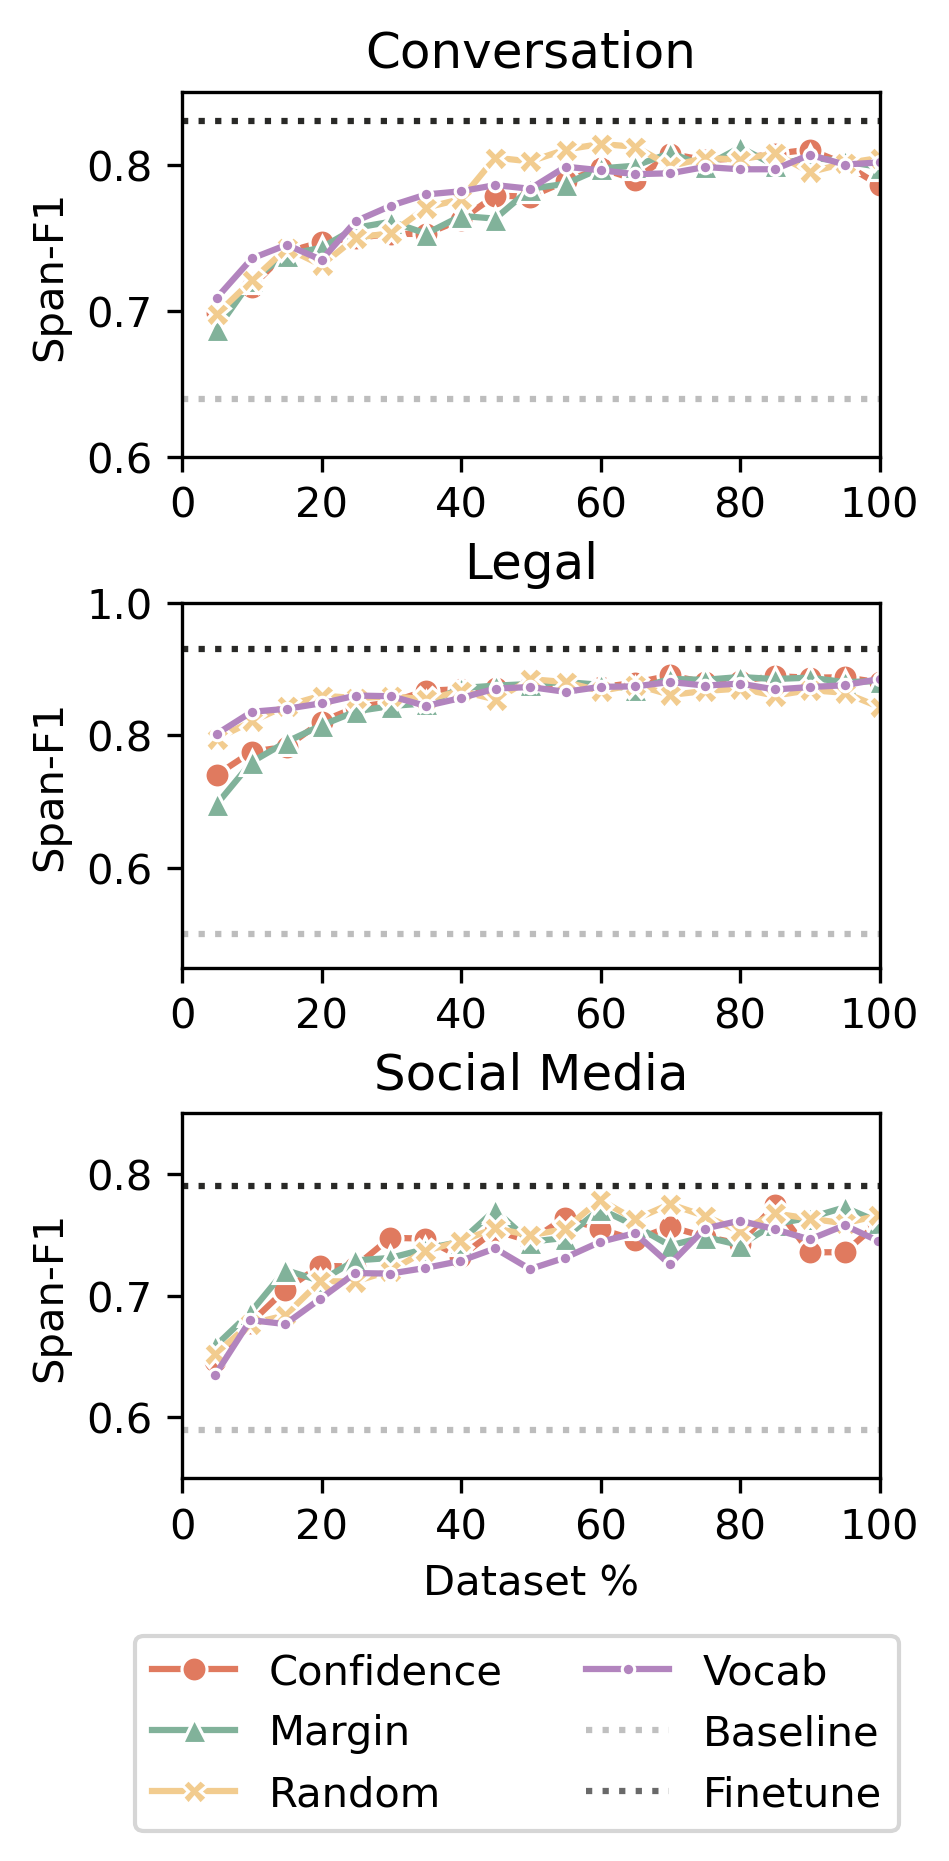

In [73]:
# increasing dpi for higher resolution
mpl.rcParams['figure.dpi'] = 300

# ranges of axes
x_min, x_max = 0, 100
y_min, y_max = [0.6,0.45,0.55], [0.85,1,0.85]


n_cols, n_rows = 1, 3
fig, ax = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(3,6))
dfs = [conv_df, legal_df, some_df]
dfs = [df.replace({'method': {'confidence': 'Confidence', 'margin': 'Margin', 'random': 'Random', 'vocab':'Vocab'}}) for df in dfs]
custom_colors = {'confidence': '#e07a5f', 'margin': '#81b29a', 'random': '#f2cc8f', 'vocab': '#b284be'}
n_methods = len(custom_colors)
markers = {'confidence': 'o', 'margin': '^', 'random': 'X', 'vocab':'.'}
titles = ['Conversation', 'Legal', 'Social Media']
baseline_values = [0.64, 0.5, 0.59]
finetune_values = [0.83, 0.93, 0.79]

for row in range(n_rows):
    for method, marker in markers.items():
        sns.lineplot(data=dfs[row][dfs[row]['method'] == method.capitalize()],  # Use capitalized method name
                        x='percentage_of_samples', 
                        y='f1', 
                        color=custom_colors[method], 
                        linestyle='-', 
                        marker=marker, 
                        ax=ax[row],
                        label=method.capitalize() if row == n_rows-1 else None)  # Use capitalized method name
    ax[row].set_ylabel('Span-F1')
    if row == 2:
        ax[row].set_xlabel('Dataset %')
    else:
        ax[row].set_xlabel('')
    ax[row].set_title(titles[row])
    ax[row].set_xlim([x_min, x_max])
    ax[row].set_ylim([y_min[row], y_max[row]])
    ax[row].axhline(y=baseline_values[row], linewidth=1.5, color='#bdbdbd', ls=':')
    ax[row].axhline(y=finetune_values[row], linewidth=1.5, color='#292927', ls=':')

# Manually add constant lines to the legend
handles, labels = ax[2].get_legend_handles_labels()
handles.extend([plt.Line2D([0], [0], color='silver', linestyle=':', label='Baseline'),
                plt.Line2D([0], [0], color='dimgray', linestyle=':', label='Finetune')])
ax[2].legend(handles=handles, labels=labels + ['Baseline', 'Finetune'], loc='center', bbox_to_anchor=(0.48, -0.7), ncol=2)
# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.4)
plt.show()

### Horizontal plot

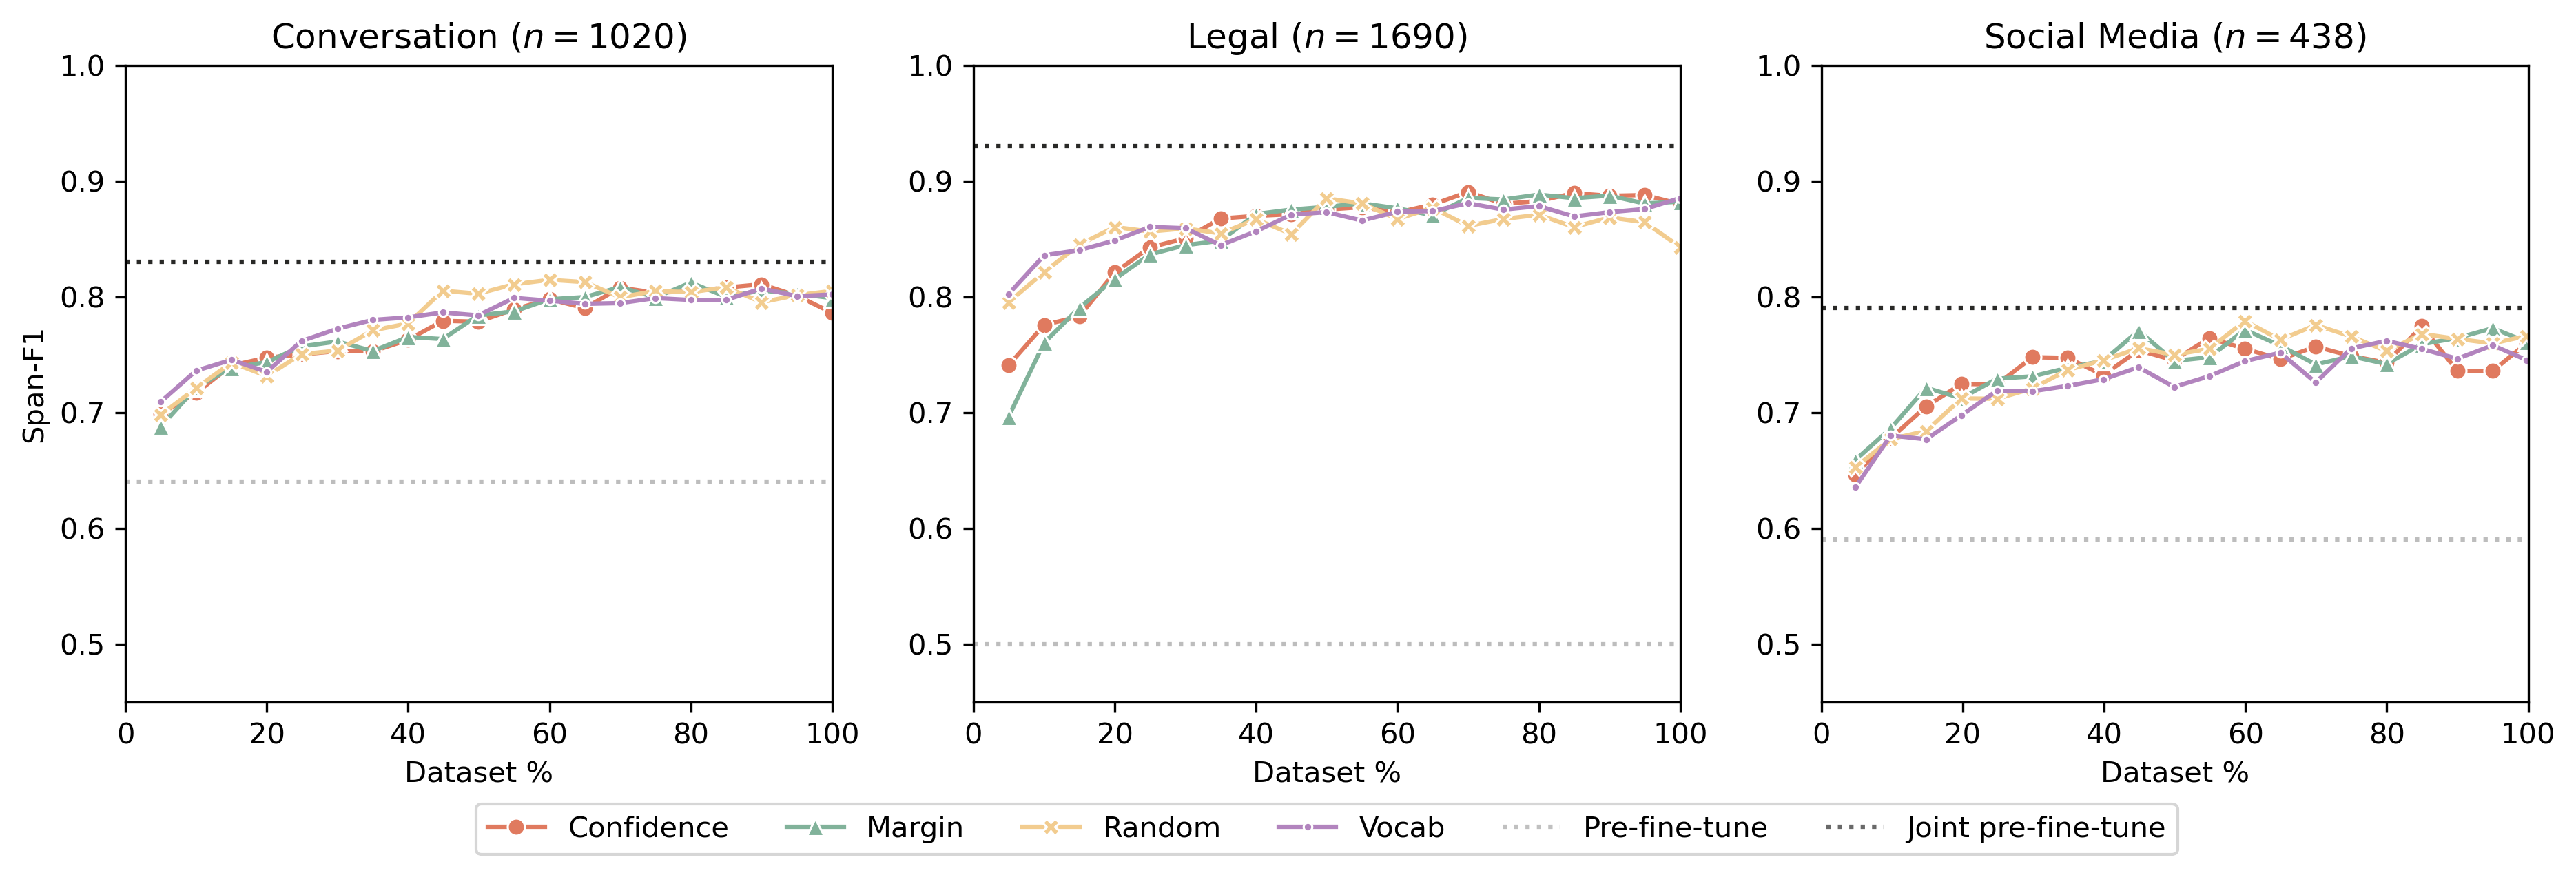

In [102]:
# increasing dpi for higher resolution
mpl.rcParams['figure.dpi'] = 300

# ranges of axes
x_min, x_max = 0, 100
y_min, y_max = 0.45 , 1


n_cols, n_rows = 3,1
fig, ax = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(15,4))
dfs = [conv_df, legal_df, some_df]
dfs = [df.replace({'method': {'confidence': 'Confidence', 'margin': 'Margin', 'random': 'Random', 'vocab':'Vocab'}}) for df in dfs]
custom_colors = {'confidence': '#e07a5f', 'margin': '#81b29a', 'random': '#f2cc8f', 'vocab': '#b284be'}
n_methods = len(custom_colors)
markers = {'confidence': 'o', 'margin': '^', 'random': 'X', 'vocab':'.'}
titles = ['Conversation ($n = 1020$)', 'Legal ($n = 1690$)', 'Social Media ($n = 438$)']
baseline_values = [0.64, 0.5, 0.59]
finetune_values = [0.83, 0.93, 0.79]

for row in range(n_cols):
    for method, marker in markers.items():
        sns.lineplot(data=dfs[row][dfs[row]['method'] == method.capitalize()],  # Use capitalized method name
                        x='percentage_of_samples', 
                        y='f1', 
                        color=custom_colors[method], 
                        linestyle='-', 
                        marker=marker, 
                        ax=ax[row],
                        label=method.capitalize() if row == n_rows-1 else None)  # Use capitalized method name
    ax[row].set_xlabel('Dataset %')
    if row == 0:
        ax[row].set_ylabel('Span-F1')
    else:
        ax[row].set_ylabel('')
    ax[row].set_title(titles[row])
    ax[row].set_xlim([x_min, x_max])
    ax[row].set_ylim([y_min, y_max])
    ax[row].axhline(y=baseline_values[row], linewidth=1.5, color='#bdbdbd', ls=':')
    ax[row].axhline(y=finetune_values[row], linewidth=1.5, color='#292927', ls=':')

# Manually add constant lines to the legend
handles, labels = ax[0].get_legend_handles_labels()
handles.extend([plt.Line2D([0], [0], color='silver', linestyle=':', label='Pre-fine-tune'),
                plt.Line2D([0], [0], color='dimgray', linestyle=':', label='Joint pre-fine-tune')])
ax[0].legend(handles=handles, labels=labels + ['Pre-fine-tune', 'Joint pre-fine-tune'], loc='center', bbox_to_anchor=(1.7, -0.2), ncol=6)
# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.4)
plt.show()